In [2]:
import sys
# на уровень выше из research_rank/
sys.path.insert(0, '..')
from pathlib import Path
import numpy as np
import pandas as pd
import json
from collections import defaultdict
from plot_json import convert_dictlist_to_matrix
import matplotlib.pyplot as plt

/Users/denis/Desktop/VS code projects/Quantum_tools/Tomography/src/research_data/../Adaptive_compresive_cending_qutrit.py:293: SyntaxWarning: invalid escape sequence '\m'
  label='$S_{\mathrm{cvx}} \pm$ std')
/Users/denis/Desktop/VS code projects/Quantum_tools/Tomography/src/research_data/../Adaptive_compresive_cending_qutrit.py:300: SyntaxWarning: invalid escape sequence '\m'
  ax1.set_ylabel('$S_{\mathrm{cvx}}$')


(CVXPY) Aug 01 11:07:22 PM: Encountered unexpected exception importing solver MOSEK:
AttributeError("module 'mosek' has no attribute 'conetype'")


  0%|          | 0/100 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/cvxpy/problems/problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100%|██████████| 100/100 [00:27<00:00,  3.62it/s]

Mean fidelity: [0.14666584 0.64610397 0.99855674] 	Std fidelity: [0.15499158 0.24310458 0.00930784]
Mean svx for protocol: [1.00000000e+00 2.13777303e-01 6.65680316e-04] 	Std s_cvx for protocol: [0.         0.14386756 0.00395773]



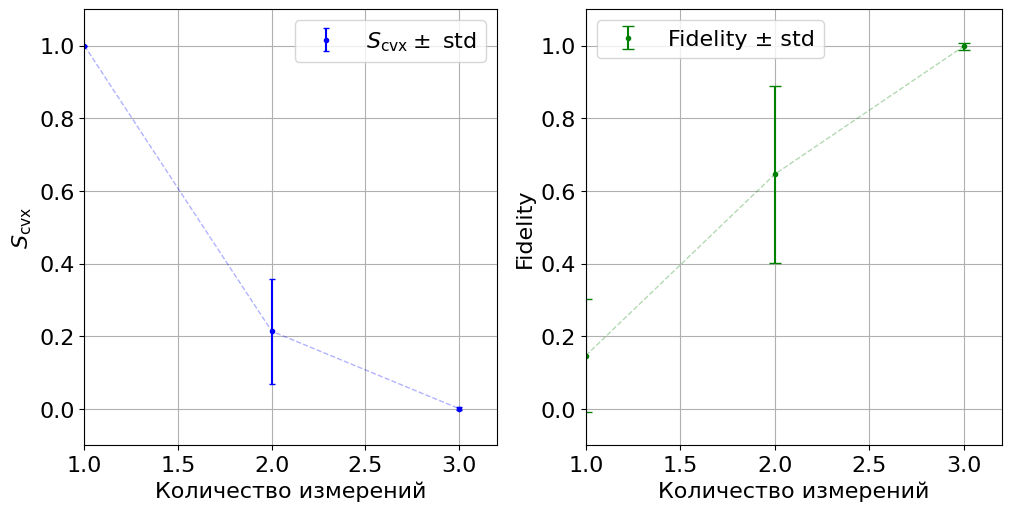

In [3]:
from Qutrit import*
from Adaptive_compresive_cending_qutrit import*
plt.rcParams.update({
    'font.size': 16,               # Размер шрифта по умолчанию
    'axes.titlesize': 16,          # Размер заголовка
    'axes.labelsize': 16,          # Размер подписей осей
    'xtick.labelsize': 16,         # Размер цифр на оси X
    'ytick.labelsize': 16,         # Размер цифр на оси Y
    'legend.fontsize': 16          # Размер шрифта легенды
})
# q1 = -10.0; q2 = 85.8; q3 = 43.2
# new_matr =  Gl_4(q2 * np.pi / 180) @ Gl_2(q1 * np.pi / 180) @ Gl_4(q3 * np.pi / 180) 
# new_el = [0]*3
# for i in range(3):
#     new_el[i] = np.array(np.conj(new_matr).T @ A00[i] @ new_matr)

protocol = [Gl_2(pi / 8) @ Gl_8(0), Gl_2(pi / 8), np.diag((1,1,1))]

tomography_1 = ACT(protocol, 1, 3)

x = np.array([1, 2, 3])
svx_list = []         
fidelity_list = []
N = 100


for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
    x_min_list, x_max_list, state_ml = tomography_1.main(rank_psevdoin=1, epsilon_ml=10*-11, epsilon_act=10**-5,\
                                                         max_iters_in_semidefinite_program=10**5)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
    
    fidelity_list_xmax_xmin = [tomography_1.Fidelity(x_min_list[0], x_max_list[0]), tomography_1.Fidelity(x_min_list[1], x_max_list[1]), tomography_1.Fidelity(x_min_list[2], x_max_list[2])]#, tomography_1.Fidelity(x_min_list[3], x_max_list[3])] 
    if svx_list_one_measurement is not np.inf :
        svx_list.append(svx_list_one_measurement)
        fidelity_list.append(np.abs(fidelity_list_xmax_xmin))

y = np.mean(np.array(svx_list),axis = 0)
std = np.std(np.array(svx_list),axis = 0)
fidelity_mean = np.mean((fidelity_list), axis = 0)
fidelity_std = np.std(np.array(fidelity_list),axis = 0)


print("Mean fidelity:", fidelity_mean , "\tStd fidelity:", fidelity_std)
print("Mean svx for protocol:", y,"\tStd s_cvx for protocol:", std)
print()
pl_fid_s_cvx(x, y, std, fidelity_mean, fidelity_std)